In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from the csv file

In [45]:
train=pd.read_csv("train.csv")
headers = train.columns
headers = list(headers)

### First, I want to examine the first elements of our data

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### The following data types are presented

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


### Analysing missing values 

In [6]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### LotFronage has missing values, but not so many. More detailed analysis is required

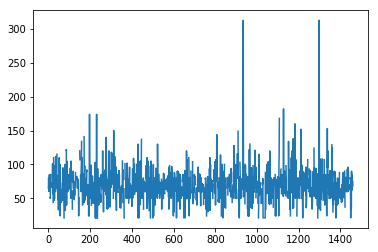

In [7]:
plt.plot(train.LotFrontage)

In [8]:
print("Median = " + str(train.LotFrontage.median()) + "\nMean = " + str(train.LotFrontage.mean()))

Median = 69.0
Mean = 70.04995836802665


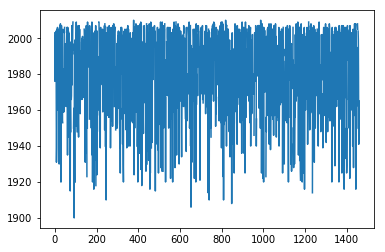

In [9]:
plt.plot(train.GarageYrBlt)

In [10]:
print("Median = " + str(train.GarageYrBlt.median()) + "\nMean = " + str(train.GarageYrBlt.mean()))

Median = 1980.0
Mean = 1978.5061638868744


In [11]:
train.select_dtypes(include='object').isnull().sum()>0

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

In [12]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [13]:
train['MSZoning'] = pd.factorize(train.MSZoning)[0]

In [14]:
train=pd.read_csv("train.csv")
print(train.shape)

(1460, 81)


### All NaN (exclude LotFrontage, MasVnrArea, GarageYrBlt) values are informative due to variable description, so we will fill all NaN values with 0. NaN values in LotFrontage, MasVnrArea, GarageYrBlt I will fill with mean

In [15]:
train["LotFrontage"] = train["LotFrontage"].fillna(value=train["LotFrontage"].mean())
train["MasVnrArea"] = train["MasVnrArea"].fillna(value=train["MasVnrArea"].mean())
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(value=train["GarageYrBlt"].mean())

In [16]:
train.fillna(0, inplace=True)

### MSSubClass, MSZoning, OverallQual, OverallCond, MoSold, YrSold  - transform from int64 to object for Dummy variables

In [17]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [18]:
train = train.astype({"MSSubClass": object, "MSZoning": object,"OverallCond": object,
                     "OverallQual": object,"MoSold": object,"YrSold": object,})

In [19]:
trainDummies = pd.get_dummies(train, prefix_sep='_', drop_first=True)

In [20]:
trainDummies.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [21]:
print(trainDummies.shape)

(1460, 304)


### Next, I will save a final dataset 

In [22]:
trainDummies.to_csv(r'C:\Users\Ivan\Documents\kaggle\House Prices Advanced Regression Techniques\Train_with_dummies.csv')

In [23]:
trainDummies.drop(['Id'], axis=1, inplace=True)


### Finised Preprocessing, applying different ML alghoritms and validating results at cross-validation

In [24]:
y = train['SalePrice']

In [25]:
trainDummies.drop(['SalePrice'], axis=1, inplace=True)

### Included all the variables and splited dataset into training and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainDummies, y, test_size=0.3, random_state=42)

In [27]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

### Finding best value of max_depth hyperparameter

### Ranfom forest

means = []
for i in range(1,40):
    regr = RandomForestRegressor(max_depth=i, random_state=0,
                             n_estimators=100)
    scores = cross_val_score(regr, trainDummies, y, cv=5)
    means.append(scores.mean())

import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

print(means)

### Mean cross_val_score of 0.855 is quite good

###  Final model:

In [35]:
regr = RandomForestRegressor(max_depth=12, random_state=42,
                             n_estimators=120)
scores = cross_val_score(regr, train, y, cv=5)

scores.mean()

0.8544819616906725

### Preprocessing testing set for submission

In [46]:
test = pd.read_csv('test.csv')
houses=pd.concat([train,test], sort=False)
houses.drop(['Id'], axis=1, inplace=True)
houses.drop(['SalePrice'], axis=1, inplace=True)  

In [47]:
houses["LotFrontage"] = houses["LotFrontage"].fillna(value=test["LotFrontage"].mean())
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(value=test["MasVnrArea"].mean())
houses["GarageYrBlt"] = houses["GarageYrBlt"].fillna(value=test["GarageYrBlt"].mean())
houses.fillna(0, inplace=True)

In [48]:
houses = houses.astype({"MSSubClass": object, "MSZoning": object,"OverallCond": object,
                    "OverallQual": object,"MoSold": object,"YrSold": object,})

houses = pd.get_dummies(houses, prefix_sep='_', drop_first=True)

In [49]:
train=houses[:1460]
test=houses[1460:]

### Fitting model, predicting and downloading CSV

In [50]:
regr.fit(train,y)
y_pred = regr.predict(test)

In [51]:
testForId = pd.read_csv('test.csv')


In [52]:
output=pd.DataFrame({'Id':testForId.Id, 'SalePrice':y_pred})
output.to_csv('submissionRandomForest.csv', index=False)

### Evaluating the quality of the model

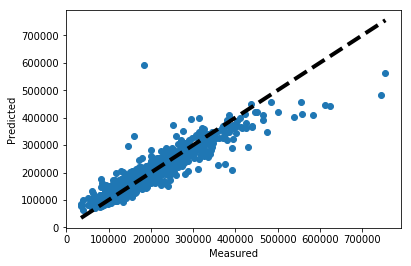

In [53]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(regr, train, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
scores = cross_val_score(gbr, train, y, cv=5)

In [55]:
scores.mean()

0.877629099142306

In [56]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('gbr', gbr), ('rf', regr)])
scores = cross_val_score(er, train, y, cv=5)

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [58]:
scores.mean()

0.8766239345969229

In [59]:
er.fit(train, y)
y_pred = er.predict(test)
output=pd.DataFrame({'Id':testForId.Id, 'SalePrice':y_pred})
output.to_csv('submissionRandomForest.csv', index=False)

### That Model gave me a submission score of 0.13939 at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard#score